<a href="https://colab.research.google.com/github/ujs/open_data/blob/master/Yelp_open_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import math
import os
import json
import matplotlib.pyplot as plt

## Data Wrangling 
Extracting data from JSON into CSV format.

In [0]:
def json_to_csv (filename, create_sample = False):
  '''converts given json file to csv'''
  json_data = []
  with open(filename, encoding = "utf8") as file:
    for line in file:
      json_data.append(json.loads(line.rstrip()))
  
  # since, each observation in the json_data list is a nested dictionary, we need to use 'from_dict'
  df = pd.DataFrame.from_dict(json_data)
  
  csvFileName = filename[:len(filename)-5] + '.csv'
  df.to_csv(csvFileName)
  print('{0} created'.format(csvFileName))

  if create_sample == True:
    np.random.seed(0)
    mask = np.random.rand(len(df)) <= 0.1
    sample = df[mask]
    sampleFileName = filename[:len(filename)-5] + '_sample.csv'

    sample.to_csv(sampleFileName)
    print('sample file, {0} created'.format(csvFileName))
    return df, sampleFileName

  else: return df,csvFileName

#testing function
filename = "content/yelp_academic_dataset_business.json"
df_business, csvname_business = json_to_csv (filename)
df_business.head()

FileNotFoundError: ignored

## Exploratory Data Analysis

In [0]:
#Understanding the basics of data
def data_basics(df):
  print('Number of features in data frame: ', len(df.columns))
  print('Features of the date frame: ', df.columns)
  d_type = {i:df[i].dtype for i in df.columns}
  print("Data type for each feature: ", d_type)
  print("Data Descriptive Stats: ", df.describe)

In [0]:
data_basics(df_business)

Number of features in data frame:  14
Features of the date frame:  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')
Data type for each feature:  {'business_id': dtype('O'), 'name': dtype('O'), 'address': dtype('O'), 'city': dtype('O'), 'state': dtype('O'), 'postal_code': dtype('O'), 'latitude': dtype('float64'), 'longitude': dtype('float64'), 'stars': dtype('float64'), 'review_count': dtype('int64'), 'is_open': dtype('int64'), 'attributes': dtype('O'), 'categories': dtype('O'), 'hours': dtype('O')}
Data Descriptive Stats:  <bound method NDFrame.describe of                    business_id  ...                                              hours
0       f9NumwFMBDn751xgFiRbNA  ...  {'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...
1       Yzvjg0SayhoZgCljUJRF9Q  ...                                               None
2       XNoUzKckA

total missing values in dataframe:  74412
business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      29045
categories        524
hours           44843
dtype: int64


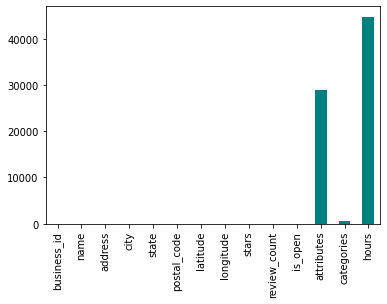

In [0]:
#Missing Values
def visualize_missing_values(df):
  missing_values = df.isnull().sum() 
  print("total missing values in dataframe: ", df.isnull().sum().sum())
  print(missing_values)
  missing_values.plot.bar(color = 'teal')

#testing function
visualize_missing_values(df_business)


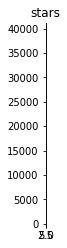

In [0]:
#


  



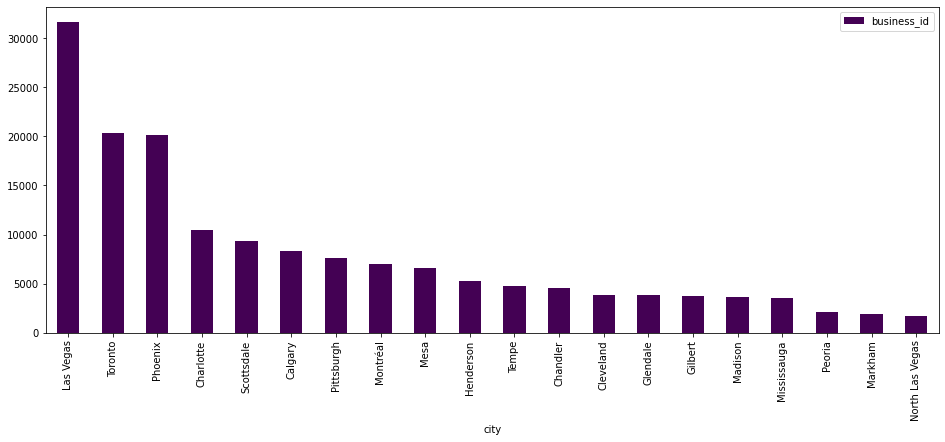

In [0]:
pivot_by_city = df_business.pivot_table(index='city', values='business_id', aggfunc='count')

#plotting top 20 cities with highest number of restaurants
top_20_cities = pivot_by_city.sort_values("business_id", ascending = [False])[:20]
top_20_cities.plot(kind = 'bar', figsize = [16,6], colormap = 'viridis')

In [0]:
#Create a new dataframe only containing American businesses
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]


us = df_business.loc[df_business['state'].isin(states)]

In [0]:
#Analysing only restaurants in the US
mask_restos = us['categories'].str.contains('Restaurants', na=False)
us_restos = us[mask_restos]
us_restos.head()

In [0]:
#Add a new column called 'Cuisine' - focus on 13 main cuisines
us_restos['cuisine'] = pd.Series()

us_restos.loc[us_restos.categories.str.contains('American'),'cuisine'] = 'American'
us_restos.loc[us_restos.categories.str.contains('Mexican'),'cuisine'] = 'Mexican'
us_restos.loc[us_restos.categories.str.contains('Italian'),'cuisine'] = 'Italian'
us_restos.loc[us_restos.categories.str.contains('Japanese'),'cuisine'] = 'Japanese'
us_restos.loc[us_restos.categories.str.contains('Chinese'),'cuisine'] = 'Chinese'
us_restos.loc[us_restos.categories.str.contains('Thai'),'cuisine'] = 'Thai'
us_restos.loc[us_restos.categories.str.contains('Mediterranean'),'cuisine'] = 'Mediterranean'
us_restos.loc[us_restos.categories.str.contains('French'),'cuisine'] = 'French'
us_restos.loc[us_restos.categories.str.contains('Vietnamese'),'cuisine'] = 'Vietnamese'
us_restos.loc[us_restos.categories.str.contains('Indian'),'cuisine'] = 'Indian'
us_restos.loc[us_restos.categories.str.contains('Korean'),'cuisine'] = 'Korean'
us_restos.loc[us_restos.categories.str.contains('African'),'cuisine'] = 'African'
us_restos.loc[us_restos.categories.str.contains('Spanish'),'cuisine'] = 'Spanish'

